## Import Libraries

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn

## Step 1: Analyzing the data

In [171]:
dataFrame = pd.read_csv("winequality-red.csv")

In [172]:
dataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [173]:
dataFrame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [174]:
dataFrame.isnull().sum()         # Checking for missing data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

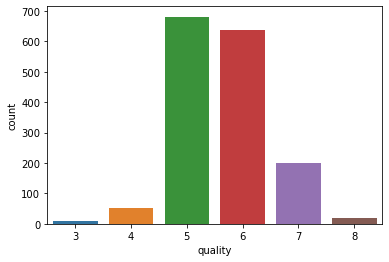

In [175]:
sbn.countplot(x= "quality" , data=dataFrame)

In [176]:
dataFrame.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

## Step 2: Splitting data into test and train

In [177]:
y = dataFrame["quality"].values 
x = dataFrame.drop("quality",axis=1).values

In [178]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [179]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state = 10)

In [182]:
len(x_train)

1071

In [183]:
len(x_test)

528

In [184]:
#Scale the data

from sklearn.preprocessing import MinMaxScaler

In [185]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Step 3: Creating models and layers with TensorFlow

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [187]:
x_train.shape

(1071, 11)

In [188]:
model = Sequential()

model.add(Dense(11,activation = "relu"))
model.add(Dense(11,activation = "relu"))
model.add(Dense(11,activation = "relu"))
model.add(Dense(11,activation = "relu"))


model.add(Dense(1))

model.compile(optimizer = "adam",loss="mse")

In [189]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [190]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
34/34 [==============================] - 1s 6ms/step - loss: 32.0084 - val_loss: 30.4608
Epoch 2/700
34/34 [==============================] - 0s 2ms/step - loss: 29.2140 - val_loss: 26.3934
Epoch 3/700
34/34 [==============================] - 0s 3ms/step - loss: 24.5320 - val_loss: 17.7127
Epoch 4/700
34/34 [==============================] - 0s 2ms/step - loss: 14.3866 - val_loss: 3.6343
Epoch 5/700
34/34 [==============================] - 0s 2ms/step - loss: 1.9447 - val_loss: 0.9099
Epoch 6/700
34/34 [==============================] - 0s 2ms/step - loss: 1.0025 - val_loss: 0.8477
Epoch 7/700
34/34 [==============================] - 0s 2ms/step - loss: 0.8435 - val_loss: 0.7752
Epoch 8/700
34/34 [==============================] - 0s 2ms/step - loss: 0.8749 - val_loss: 0.7092
Epoch 9/700
34/34 [==============================] - 0s 2ms/step - loss: 0.7729 - val_loss: 0.6623
Epoch 10/700
34/34 [==============================] - 0s 2ms/step - loss: 0.6678 - val_loss: 0.6163
Ep

In [191]:
lostData = pd.DataFrame(model.history.history)

In [192]:
lostData.head()

,loss,val_loss
0,31.712837,30.460783
1,28.645561,26.393396
2,22.543243,17.712706
3,10.803215,3.634258
4,1.446981,0.909870


<AxesSubplot:>

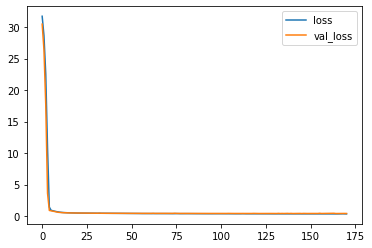

In [193]:
lostData.plot()

## Final Step: Predict

In [194]:
predictSeries = model.predict(x_test)

In [195]:
predictSeries

array([[5.6791162],
       [5.0274677],
       [5.910995 ],
       [5.718625 ],
       [5.367093 ],
       [6.1983447],
       [6.09115  ],
       [5.801489 ],
       [5.2085137],
       [5.0127397],
       [6.3484273],
       [5.0061355],
       [5.1533003],
       [5.091789 ],
       [5.282812 ],
       [5.453872 ],
       [5.4581046],
       [5.8229384],
       [5.5517015],
       [4.7643876],
       [4.9905195],
       [5.950853 ],
       [5.72512  ],
       [5.014226 ],
       [5.0669785],
       [5.7480025],
       [4.8830953],
       [5.392055 ],
       [5.910391 ],
       [5.4393096],
       [5.17316  ],
       [5.463775 ],
       [6.0693727],
       [6.4405227],
       [6.3504496],
       [5.192011 ],
       [6.4996505],
       [5.3888817],
       [5.818059 ],
       [5.23976  ],
       [5.7263384],
       [5.717328 ],
       [5.3876204],
       [5.935127 ],
       [4.718372 ],
       [6.09115  ],
       [5.663525 ],
       [5.717969 ],
       [5.8726315],
       [5.688933 ],


In [196]:
np.array(y_test)

array([5, 5, 6, 6, 5, 6, 7, 6, 5, 5, 7, 4, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 7, 8, 5, 5, 8, 6, 6, 6, 6, 7, 5, 7,
       5, 7, 6, 7, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 7, 6, 6, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 7, 5, 7, 7, 5, 6, 5, 6, 4, 4, 5,
       5, 5, 6, 5, 7, 6, 5, 4, 5, 4, 5, 6, 7, 5, 6, 6, 6, 5, 5, 6, 6, 5,
       5, 6, 7, 5, 5, 5, 5, 5, 8, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 7, 7,
       6, 4, 5, 5, 7, 8, 6, 7, 6, 5, 5, 6, 8, 7, 6, 5, 5, 7, 6, 8, 5, 5,
       5, 5, 5, 6, 7, 5, 6, 6, 5, 5, 6, 7, 5, 5, 5, 4, 6, 7, 6, 5, 7, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 4, 8, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5,
       5, 7, 6, 5, 7, 5, 6, 5, 5, 5, 3, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 6, 7, 7, 5, 6, 5, 5, 6, 6, 7, 7, 7, 6, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 5, 7, 7, 6, 6, 3, 4,
       5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 7, 6, 6, 6,

In [197]:
dataFrame.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [198]:
predictDf = pd.DataFrame(y_test,columns = ["Real Values"])

In [199]:
predictDf

,Real Values
0,5
1,5
2,6
3,6
4,5
...,...
523,6
524,7
525,6
526,5


In [200]:
predictSeries = pd.DataFrame(predictSeries.reshape(528,),columns=["Predict Values"])

In [201]:
predictSeries

,Predict Values
0,5.679116
1,5.027468
2,5.910995
3,5.718625
4,5.367093
...,...
523,5.678459
524,6.642368
525,5.829854
526,4.978619


In [202]:
resultTable = pd.concat([predictDf,predictSeries],axis=1)

In [203]:
resultTable

,Real Values,Predict Values
0,5,5.679116
1,5,5.027468
2,6,5.910995
3,6,5.718625
4,5,5.367093
...,...,...
523,6,5.678459
524,7,6.642368
525,6,5.829854
526,5,4.978619


<AxesSubplot:xlabel='Real Values', ylabel='Predict Values'>

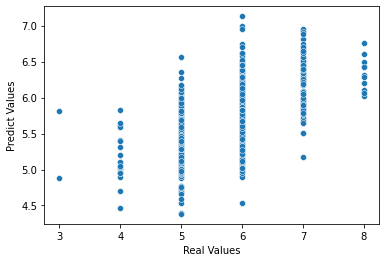

In [204]:
sbn.scatterplot(x="Real Values",y="Predict Values",data = resultTable)

## Example: predicting future data

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [206]:
#Deviation rate

mean_absolute_error(resultTable["Real Values"],resultTable["Predict Values"])

0.5055731562050906

In [207]:
dataFrame.iloc[3]

fixed acidity           11.200
volatile acidity         0.280
citric acid              0.560
residual sugar           1.900
chlorides                0.075
free sulfur dioxide     17.000
total sulfur dioxide    60.000
density                  0.998
pH                       3.160
sulphates                0.580
alcohol                  9.800
quality                  6.000
Name: 3, dtype: float64

In [208]:
newData = dataFrame.drop("quality",axis=1).iloc[3]

In [209]:
newData

fixed acidity           11.200
volatile acidity         0.280
citric acid              0.560
residual sugar           1.900
chlorides                0.075
free sulfur dioxide     17.000
total sulfur dioxide    60.000
density                  0.998
pH                       3.160
sulphates                0.580
alcohol                  9.800
Name: 3, dtype: float64

In [210]:
newData = scaler.transform(newData.values.reshape(-1,11))

In [211]:
model.predict(newData) #The quality to have: 6 , predict:5.67

array([[5.6682816]], dtype=float32)

## the End